<a href="https://colab.research.google.com/github/styavit/Collaboratory/blob/main/MNIST_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras  # Keras API
import numpy as np
import matplotlib.pyplot as plt # For plotting images and results

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


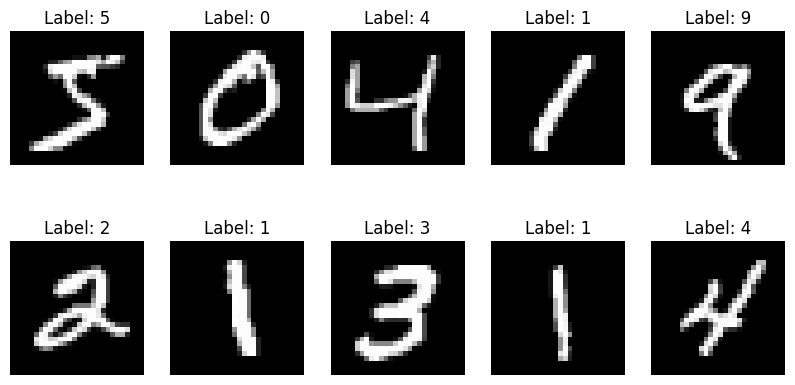

Pixel value range (min-max): 0 - 255


In [3]:
# Print the shape of the data
print("Shape of x_train:", x_train.shape)  # Expected: (60000, 28, 28) -> 60,000 images, each 28x28 pixels
print("Shape of y_train:", y_train.shape)  # Expected: (60000,)
print("Shape of x_test:", x_test.shape)    # Expected: (10000, 28, 28)
print("Shape of y_test:", y_test.shape)    # Expected: (10000,)

# Display a few sample images and their labels
plt.figure(figsize=(10,5))
for i in range(10): # Display first 10 images
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray') # cmap='gray' for grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off') # Turn off axis numbers and ticks
plt.show()

# Check the range of pixel values (e.g., for the first image)
print("Pixel value range (min-max):", np.min(x_train[0]), "-", np.max(x_train[0])) # Expected: 0 - 255

In [4]:
x_train_flattened = x_train.reshape(60000, 784)
x_test_flattened = x_test.reshape(10000, 784)

In [5]:
x_train_normalized = x_train_flattened.astype('float32') / 255.0
x_test_normalized = x_test_flattened.astype('float32') / 255.0

In [12]:
num_classes = 10 # Digits 0-9
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

# Check the shape of y_train_categorical
print("Shape of y_train_categorical:", y_train_categorical.shape) # Expected: (60000, 10)
print("Example of one-hot encoded label (original y_train[0]):", y_train[4])
print("One-hot encoded y_train_categorical[0]:", y_train_categorical[4])

Shape of y_train_categorical: (60000, 10)
Example of one-hot encoded label (original y_train[0]): 9
One-hot encoded y_train_categorical[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
model = keras.Sequential([
    # Removed the Flatten layer as the data is already flattened
    # keras.layers.Flatten(input_shape=(28, 28)),

    # The input_shape should be defined in the first processing layer,
    # which is the Dense layer in this case, matching the shape of the flattened data (784).
    keras.layers.Dense(128, activation='relu', input_shape=(784,)), # Hidden layer with 128 neurons, ReLU activation
    keras.layers.Dropout(0.2), # Optional: Dropout for regularization to prevent overfitting

    keras.layers.Dense(num_classes, activation='softmax') # Output layer: num_classes neurons (10 for digits),
                                                          # Softmax for multi-class probability output
])

# If you used Flatten layer above, the first Dense layer doesn't strictly need input_shape
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(num_classes, activation='softmax')
# ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Use this if labels are one-hot encoded
              # loss='sparse_categorical_crossentropy', # Use this if labels are integers
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
batch_size = 32  # Number of samples processed before the model is updated
epochs = 10      # Number of complete passes through the training dataset

history = model.fit(x_train_normalized, y_train_categorical,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1) # Use 10% of training data for validation
                    # Alternatively, you can pass validation_data=(x_val, y_val) if you created a separate validation set

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8519 - loss: 0.5061 - val_accuracy: 0.9663 - val_loss: 0.1245
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9525 - loss: 0.1658 - val_accuracy: 0.9720 - val_loss: 0.0977
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1100 - val_accuracy: 0.9773 - val_loss: 0.0785
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9712 - loss: 0.0892 - val_accuracy: 0.9788 - val_loss: 0.0758
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9764 - loss: 0.0764 - val_accuracy: 0.9810 - val_loss: 0.0709
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0620 - val_accuracy: 0.9778 - val_loss: 0.0739
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9814 - loss: 0.0572 - val_accuracy: 0.9797 - val_loss: 0.0695
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0511 -

In [19]:
loss, accuracy = model.evaluate(x_test_normalized, y_test_categorical, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.0769
Test Accuracy: 0.9786


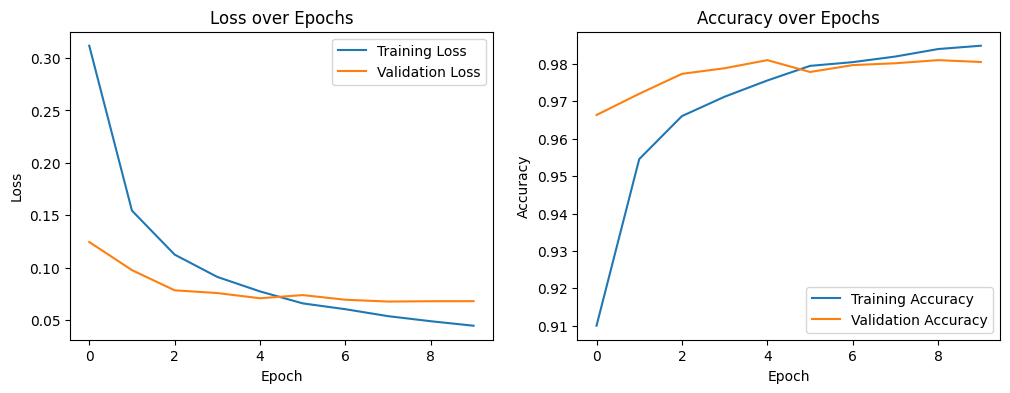

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


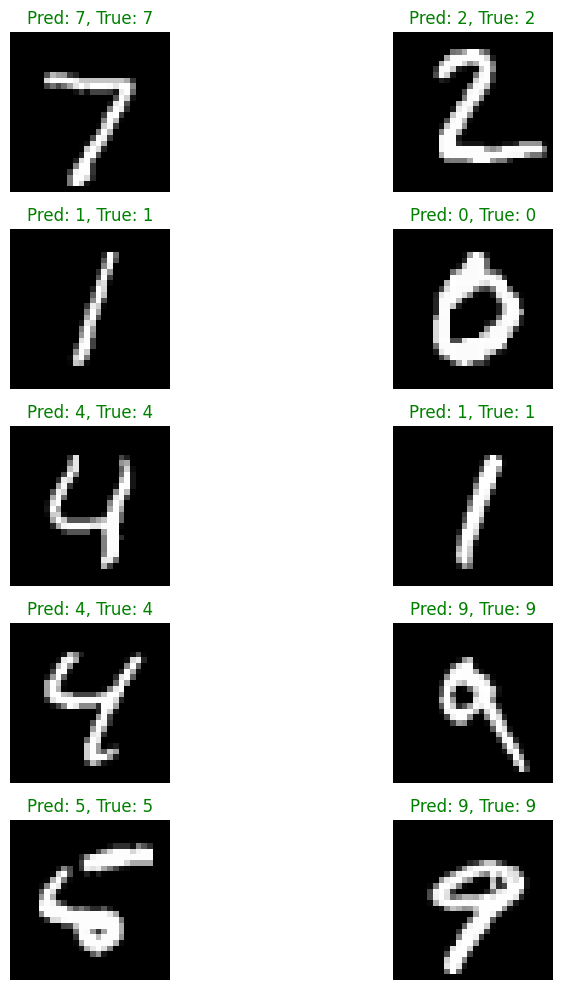

In [21]:
predictions = model.predict(x_test_normalized)

# Display a few test images and their predicted labels
plt.figure(figsize=(10,10))
for i in range(10): # Display first 10 test images
    plt.subplot(5, 2, i+1)
    plt.imshow(x_test[i], cmap='gray') # Show original test image
    predicted_label = np.argmax(predictions[i]) # Get the class with the highest probability
    true_label = y_test[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Pred: {predicted_label}, True: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()